In [10]:
# Step 1: Install yfinance
!pip install yfinance

# Step 2: Import libraries
import yfinance as yf
import pandas as pd

# Step 3: Choose stock symbols and time range
stocks = ["AAPL", "MSFT", "GOOGL"]
start_date = "2010-01-01"
end_date = "2025-01-01"

# Step 4: Download data
all_data = {}
for symbol in stocks:
    data = yf.download(symbol, start=start_date, end=end_date)
    all_data[symbol] = data
    print(f"Downloaded {symbol} data, shape: {data.shape}")

# Step 5: Save to CSV (optional)
for symbol, df in all_data.items():
    df.to_csv(f"{symbol}_historical.csv")


/tmp/ipython-input-3826186292.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3826186292.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3826186292.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Downloaded AAPL data, shape: (3774, 5)
Downloaded MSFT data, shape: (3774, 5)
Downloaded GOOGL data, shape: (3774, 5)


In [11]:
import pandas as pd

dataset_1 = pd.read_csv('AAPL_historical.csv')
dataset_2 = pd.read_csv('MSFT_historical.csv')
dataset_3 = pd.read_csv('GOOGL_historical.csv')

dataset_all = pd.concat([dataset_1, dataset_2, dataset_3], ignore_index=True)

dataset_all.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.418383598327637,6.433079146557626,6.369498276526275,6.400988794222488,493729600
3,2010-01-05,6.429478645324707,6.465767829443222,6.3955883986316175,6.436076824409361,601904800
4,2010-01-06,6.327210903167725,6.454972873596536,6.320612722382102,6.429480302803004,552160000


In [12]:
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11328 entries, 0 to 11327
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   11328 non-null  object
 1   Close   11325 non-null  object
 2   High    11325 non-null  object
 3   Low     11325 non-null  object
 4   Open    11325 non-null  object
 5   Volume  11325 non-null  object
dtypes: object(6)
memory usage: 531.1+ KB


In [13]:
dataset_all.describe()

,Price,Close,High,Low,Open,Volume
count,11328,11325,11325,11325,11325,11325
unique,3776,11043,11317,11322,11321,11163
top,2024-12-06,56.047420501708984,30.69837884153154,55.88548546289406,47.501882481697514,22288000
freq,3,4,2,2,2,3


In [14]:
dataset_all.isnull().sum()

,0
Price,0
Close,3
High,3
Low,3
Open,3
Volume,3


In [15]:
dataset_all = dataset_all.dropna()
dataset_all.isnull().sum()

,0
Price,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [16]:
dataset_all.duplicated().sum()


np.int64(0)

In [17]:
data = dataset_all[['Close']].values

In [21]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
dataset_all[numeric_cols] = dataset_all[numeric_cols].apply(pd.to_numeric, errors='coerce')

dataset_all = dataset_all.dropna()

data = dataset_all[['Close']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data.shape


(11322, 1)

In [23]:
import numpy as np

X = []
y = []

sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (11262, 60)
y shape: (11262,)


In [24]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X reshaped:", X.shape)


X reshaped: (11262, 60, 1)


In [27]:
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (9009, 60, 1)
y_train: (9009,)
X_test: (2253, 60, 1)
y_test: (2253,)


In [29]:
# Predict
predicted = model.predict(X_test)

# Inverse transform to original price scale
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


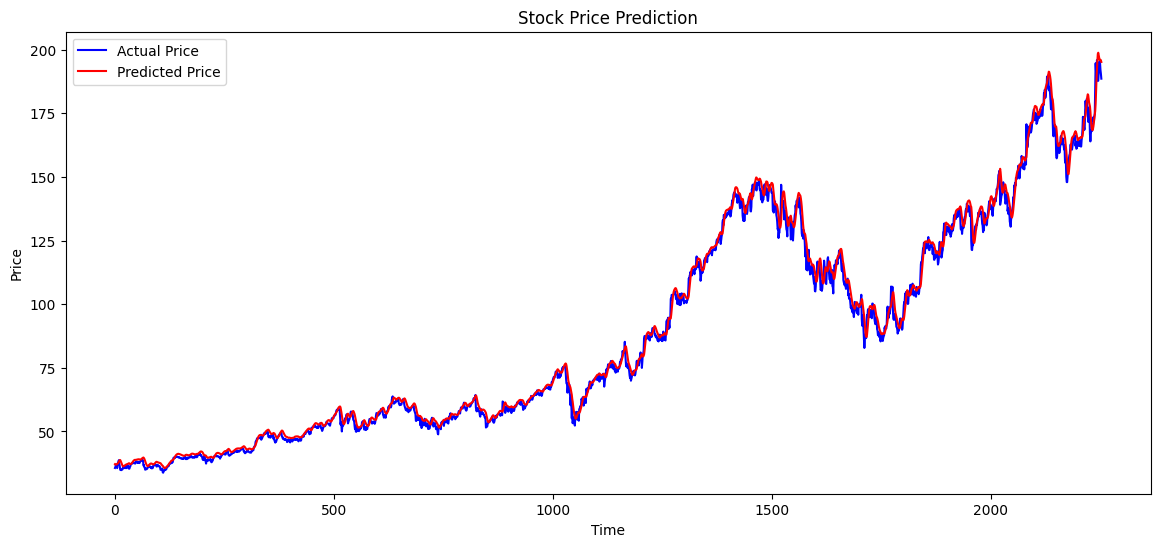

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_test_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 0.0105 - val_loss: 2.1087e-04
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 0.0011 - val_loss: 5.7646e-06
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 7.2568e-04 - val_loss: 6.6831e-06
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 2.7760e-04 - val_loss: 7.6857e-06
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 7.3826e-04 - val_loss: 1.0360e-05
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 4.4293e-04 - val_loss: 1.1260e-05
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 1.2928e-04 - val_loss: 4.7626e-05
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 1.6918e-04 - val_loss: 3.8434e-06
Epoch 9/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 6.2923e-04 - val_loss: 2.4467e-06
Epoch 10/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - loss: 1.4131e-04 - val_loss: 3.6306e-06
Epoch 11/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - l

In [33]:
model.save("stock_lstm.keras")